# Reconstruction Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob
from os.path import expanduser

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt
import numpy as np

yp.config.setDefaultBackend('arrayfire')
yp.config.setDefaultDatatype('float32')

## Define Output Path

In [9]:
output_path = os.path.expanduser('~/datasets/motiondeblur/pulse_comparison')
if not os.path.exists(output_path):
    os.mkdir(output_path)

## Load Data

In [53]:
dataset_full_path = '/Users/zfphil/datasets/motiondeblur/01-17-19-MotionDeblur/beads_coded_raster_250_motion deblur_2019_01_17_18_48_08/'

# Create dataset object (loads metadata)
dataset = Dataset(dataset_full_path, subtract_dark_current=False)#'res' not in dataset_label)

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

Loading 1 frames...


## Perform Registration and Normalization

In [54]:
force = True

# Perform registration
dataset.motiondeblur.register(force=force, frame_offset=-22, segment_offset=(15, -290), debug=False,
                              frame_registration_mode='xc', segment_registration_mode='xc')

# Perform normalization
dataset.motiondeblur.normalize(force=force)

# Perform kernel shape 
dataset.metadata.calibration['blur_vector'] = {'scale': {'axis': 1, 'factor': 1}}

Loading 7 frames...


Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    2.89e+06    |       0.00       |    0.00e+00    |  468.6 MB / 6172.9 MB  |
|   10   |    1.80e+03    |       1.60       |    9.66e-01    |  468.6 MB / 6258.3 MB  |
|   20   |    1.03e+03    |       3.27       |    1.90e+00    |  468.6 MB / 6258.3 MB  |
|   30   |    6.18e+02    |       4.85       |    3.56e+00    |  468.6 MB / 6258.3 MB  |
|   40   |    3.94e+02    |       6.48       |    4.14e+00    |  468.6 MB / 6258.3 MB  |
|   50   |    2.59e+02    |       8.15       |    3.95e+00    |  468.6 MB / 6258.3 MB  |
|   60   |    1.76e+02    |       9.85       |    3.72e+00    |  468.6 MB / 6258.3 MB  |
|   70   |    1.25e+02    |      11.51       |    3.43e+00    |  468.6 MB / 6258.3 MB  |
|   80   |    9.62e+01    |      13.19       |    3.06e+00    |  468.6 MB / 6258.3 MB  |
|   90   |    7.55e+0

<IPython.core.display.Javascript object>


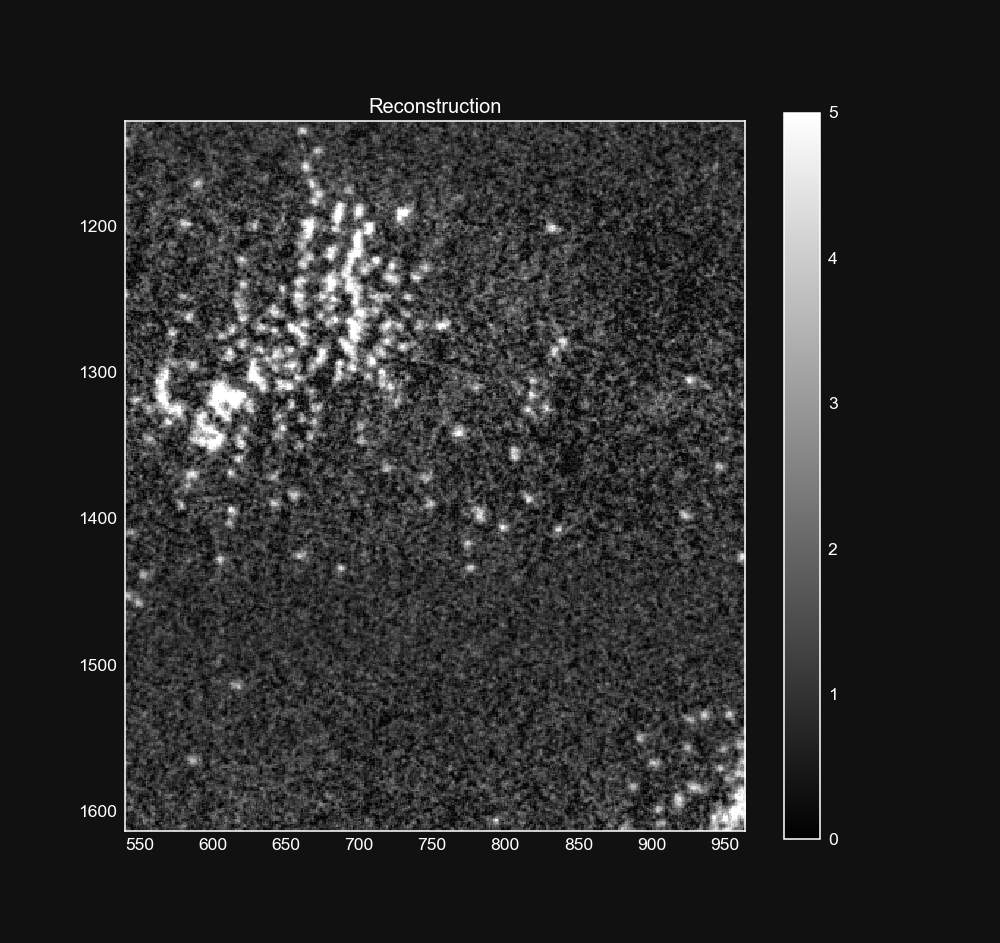

Saved .npz file to /Users/zfphil/datasets/motiondeblur/pulse_comparison/beads_coded_raster_250_motion deblur_2019_01_17_18_48_08_regularize=[].npz


/Users/zfphil/.conda/lib/python3.7/site-packages/scikit_image-0.14.1-py3.7-macosx-10.7-x86_64.egg/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/zfphil/.conda/lib/python3.7/site-packages/scikit_image-0.14.1-py3.7-macosx-10.7-x86_64.egg/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Saved reconstruction .png file to /Users/zfphil/datasets/motiondeblur/pulse_comparison/beads_coded_raster_250_motion deblur_2019_01_17_18_48_08_regularize=[].png
Saved measurement .png file to /Users/zfphil/datasets/motiondeblur/pulse_comparison/beads_coded_raster_250_motion deblur_2019_01_17_18_48_08_regularize=[].png


In [55]:
# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=100, pad_mode=0, use_psf=False, use_median_filter=True)

# Perform reconstruction
recon.reconstruct(iteration_count=100, step_size=1, frame_number=4, mode='single', reg_types={})

# Show result
recon.show()
plt.clim(0,5)

# Save result
recon.save(output_path, filename=recon.dataset.metadata.file_header, formats=['png', 'npz'], save_raw=True, downsample=4)